Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')
       Number_of_vehicles_involved  Number_of_casualties
count                  2889.000000           2889.000000
mean                      2.011076              1.529249
std                       0.635308             

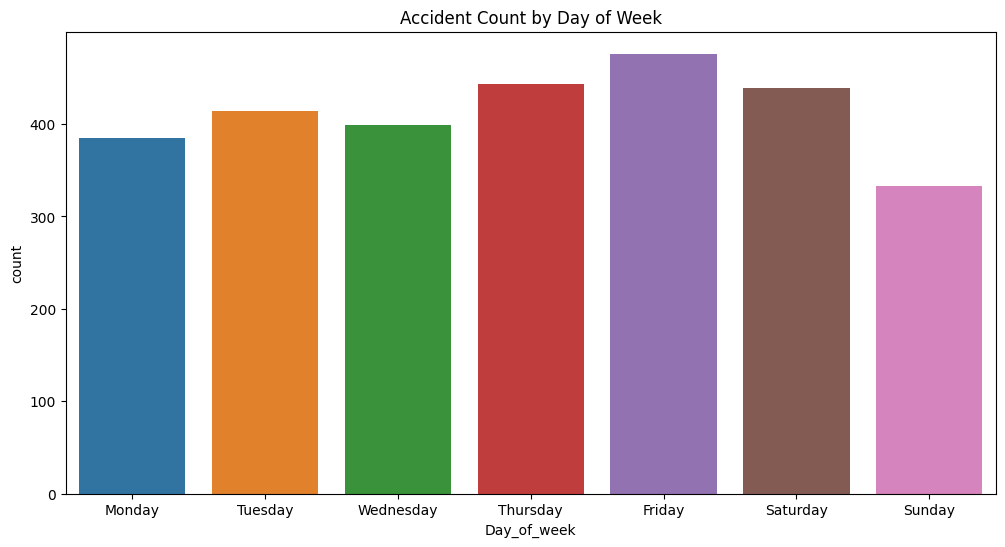

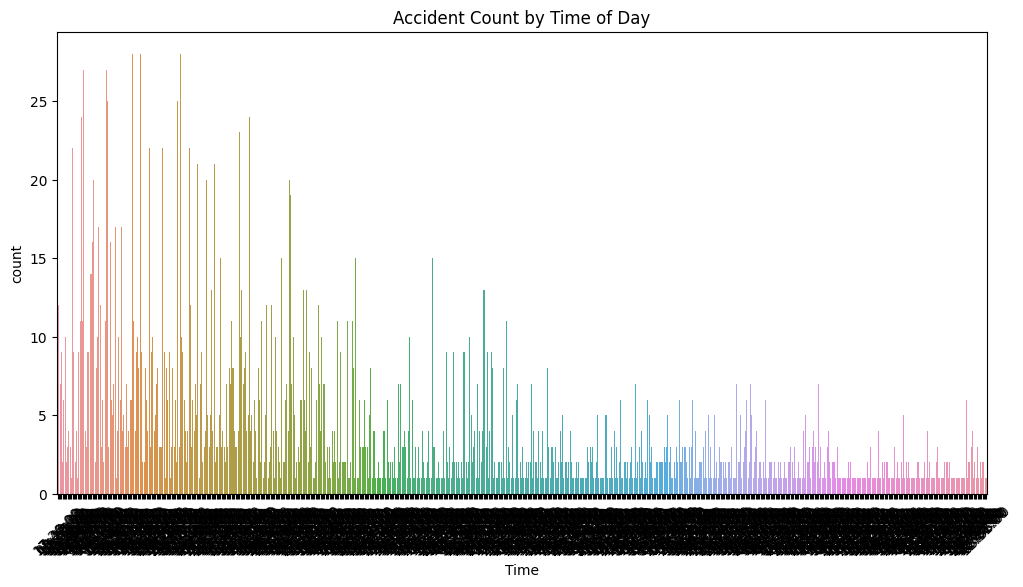

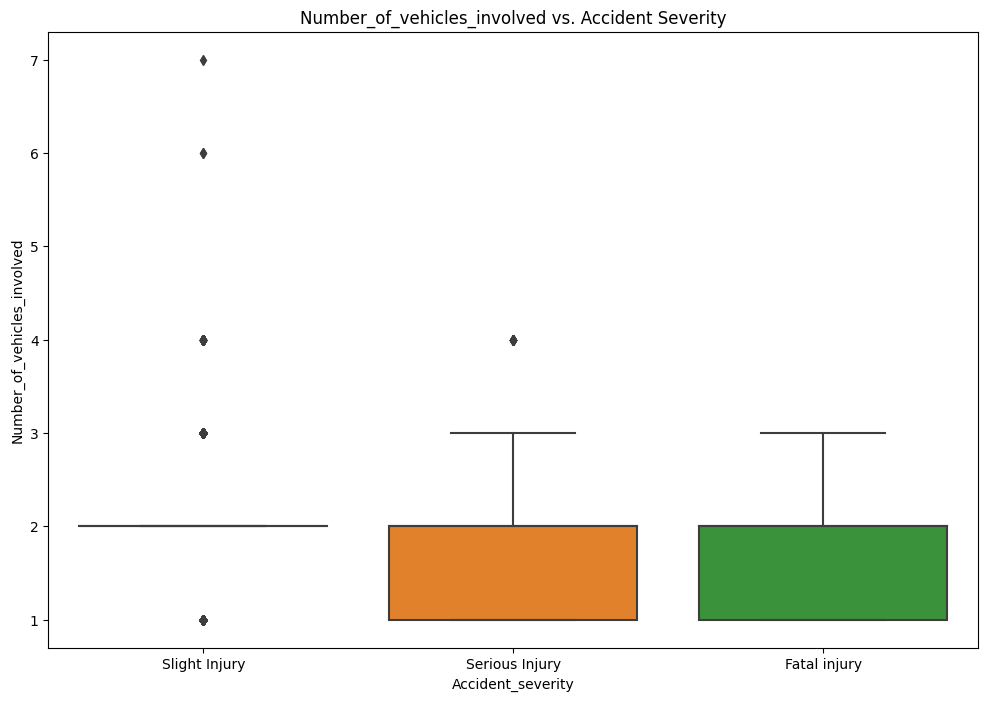

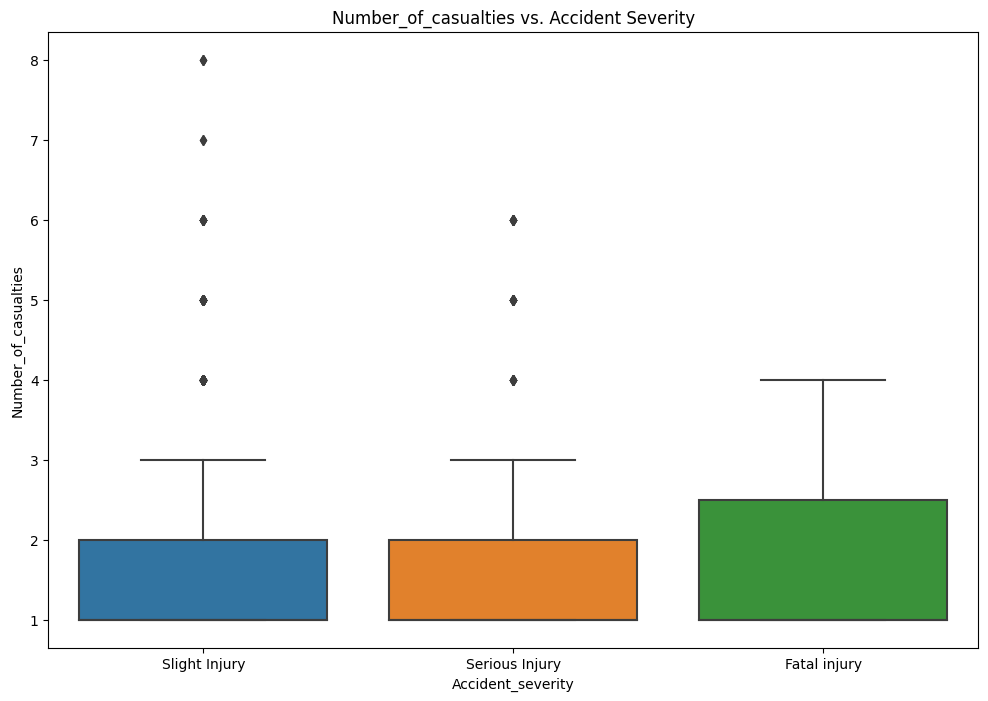

C:\Users\Shobhit Rajguru\AppData\Local\Temp\ipykernel_19212\1849171217.py:64: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


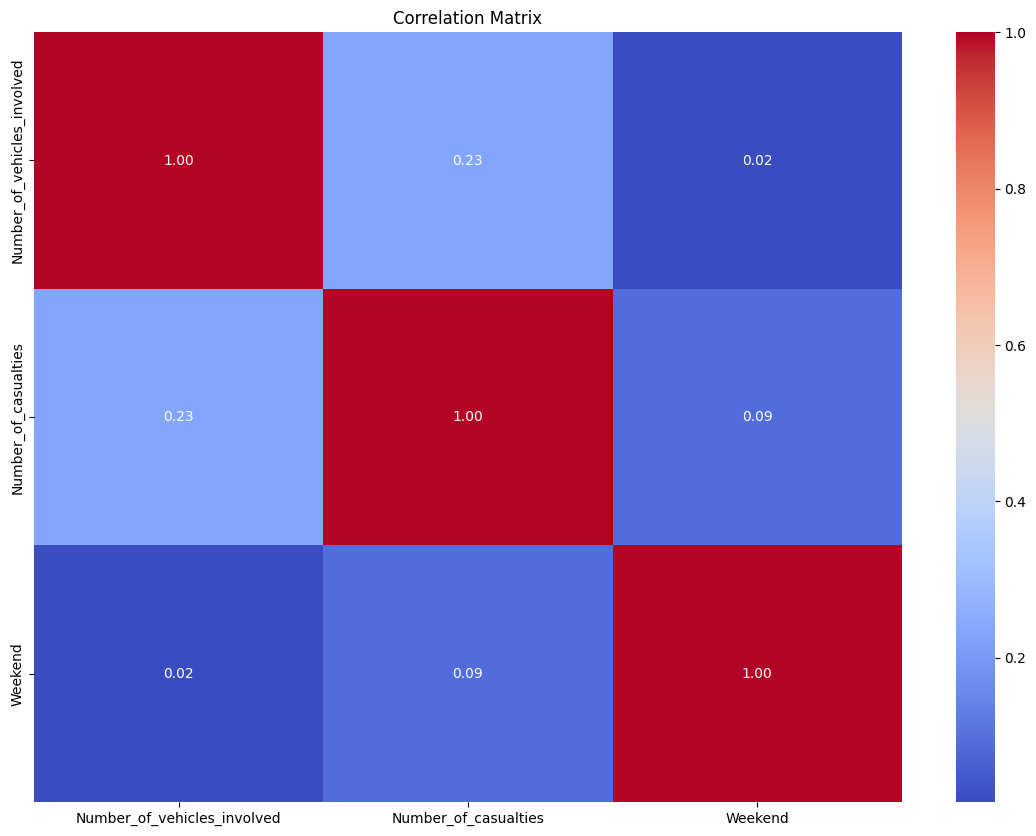

Accuracy: 0.8719723183391004
Classification Report:
                 precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00         8
Serious Injury       1.00      0.01      0.03        67
 Slight Injury       0.87      1.00      0.93       503

      accuracy                           0.87       578
     macro avg       0.62      0.34      0.32       578
  weighted avg       0.87      0.87      0.81       578

Key Findings:
Recommendations:


C:\Users\Shobhit Rajguru\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shobhit Rajguru\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shobhit Rajguru\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the data
df = pd.read_csv('accident.csv')
df
# Display the column names in the dataset
print(df.columns)

# 1. Data Cleaning and Preparation
# Handle missing values if any
df = df.dropna()  # Placeholder for handling missing values

# Convert categorical variables to suitable format
df['Day_of_week'] = pd.Categorical(df['Day_of_week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

# Convert time-related columns to a consistent format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# 2. Exploratory Data Analysis (EDA)
# Summary statistics
print(df.describe())

# Explore distribution of categorical variables
print(df['Day_of_week'].value_counts())
print(df['Road_surface_conditions'].value_counts())
# ...

# Accident trends over days of the week and times of the day
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_week', data=df)
plt.title('Accident Count by Day of Week')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Time', data=df)
plt.title('Accident Count by Time of Day')
plt.xticks(rotation=45)
plt.show()

# 3. Visualizations (Continued)
# Example: Relationship between numeric features and accident severity
numeric_features = ['Number_of_vehicles_involved', 'Number_of_casualties']

for feature in numeric_features:
    try:
        plt.figure(figsize=(12, 8))
        sns.boxplot(x='Accident_severity', y=feature, data=df)
        plt.title(f'{feature} vs. Accident Severity')
        plt.show()
    except ValueError as e:
        print(f"Error: {e}")


# 4. Feature Engineering (Continued)
# Example: Create a new feature representing whether it's a weekday or weekend
df['Weekend'] = df['Day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

# 5. Identify Patterns (Example: Correlation Matrix)
correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 6. Machine Learning (Optional)
# Build a machine learning model to predict accident severity
# Assuming 'Accident_severity' is the target variable
X = df.drop(['Accident_severity'], axis=1)
y = df['Accident_severity']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 7. Conclusion and Recommendations (Continued)
# Example: Provide key findings and recommendations based on the analysis
print("Key Findings:")
# ...

print("Recommendations:")
# ...

# Save the modified DataFrame with additional features
df.to_csv('accident_processed.csv', index=False)
